# 김해 화재 발생 예측 프로젝트

+ 김해지역은 화재가 계절 및 장소 등에 관계 없이 잇따라 발생하고 있어 시민의 인명과 재산의 피해를 줄이기 위한 다양한 대책이 요구되고 있다.  


+ 소방 및 건물관련 정보를 융합하여 화재 위험도에 대해 분석 및 예측하고 이를 이용하여 화재에 대한 예방활동 하는데 도움이 되고자 하는 프로젝트

+ GOAL --> 김해시의 화재 위험 예측 모델 생성


+ Metric --> 평가 방법은 F1 Score

# Data 설명

+ PJT002_train.csv --> 경상남도 지역의 날짜, 시간, 건물화재여부, 건물정보 등에 대한 정보를 담고있습니다.(무작위 샘플링)


+ PJT002_validation.csv --> 위와 동일하되, 김해시 지역으로 한정되어있습니다.


+ PJT002_test.csv --> 위와 동일하되, 김해시 지역으로 한정되어있습니다.예측해야하는 fr_yn 이 없습니다.


# Data Load

경상남도 화재 데이터인 train data 불러온다.

In [47]:
import seaborn as sns
import pandas as pd
data=pd.read_csv("PJT002_train.csv")

In [48]:
pd.set_option('display.max_columns', None)
data.tail()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,gas_engry_us_201501,ele_engry_us_201501,gas_engry_us_201502,ele_engry_us_201502,gas_engry_us_201503,ele_engry_us_201503,gas_engry_us_201504,ele_engry_us_201504,gas_engry_us_201505,ele_engry_us_201505,gas_engry_us_201506,ele_engry_us_201506,gas_engry_us_201507,ele_engry_us_201507,gas_engry_us_201508,ele_engry_us_201508,gas_engry_us_201509,ele_engry_us_201509,gas_engry_us_201510,ele_engry_us_201510,gas_engry_us_201511,ele_engry_us_201511,gas_engry_us_201512,ele_engry_us_201512,gas_engry_us_201601,ele_engry_us_201601,gas_engry_us_201602,ele_engry_us_201602,gas_engry_us_201603,ele_engry_us_201603,gas_engry_us_201604,ele_engry_us_201604,gas_engry_us_201605,ele_engry_us_201605,gas_engry_us_201606,ele_engry_us_201606,gas_engry_us_201607,ele_engry_us_201607,gas_engry_us_201608,ele_engry_us_201608,gas_engry_us_201609,ele_engry_us_201609,gas_engry_us_201610,ele_engry_us_201610,gas_engry_us_201611,ele_engry_us_201611,gas_engry_us_201612,ele_engry_us_201612,gas_engry_us_201701,ele_engry_us_201701,gas_engry_us_201702,ele_engry_us_201702,gas_engry_us_201703,ele_engry_us_201703,gas_engry_us_201704,ele_engry_us_201704,gas_engry_us_201705,ele_engry_us_201705,gas_engry_us_201706,ele_engry_us_201706,gas_engry_us_201707,ele_engry_us_201707,gas_engry_us_201708,ele_engry_us_201708,gas_engry_us_201709,ele_engry_us_201709,gas_engry_us_201710,ele_engry_us_201710,gas_engry_us_201711,ele_engry_us_201711,gas_engry_us_201712,ele_engry_us_201712,gas_engry_us_201801,ele_engry_us_201801,gas_engry_us_201802,ele_engry_us_201802,gas_engry_us_201803,ele_engry_us_201803,gas_engry_us_201804,ele_engry_us_201804,gas_engry_us_201805,ele_engry_us_201805,gas_engry_us_201806,ele_engry_us_201806,gas_engry_us_201807,ele_engry_us_201807,gas_engry_us_201808,ele_engry_us_201808,gas_engry_us_201809,ele_engry_us_201809,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
59194,2016-12-03 14:25,N,동.식물 관련시설,경량철골구조,2,423.000,423.0000,3010.0,1.99612e+07,NaN,NaN,NaN,11.2,NaN,0.2,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,목,91817,계획관리지역,지정되지않음,주거기타,세로한면(가),경상남도 함안군 칠원읍,20955.0,3435,NaN,895,139.0,N,1131,0,0,3591,3624,6679,914,0,일반대상물,N,N,Y,N,N,N,N
59195,2016-10-29 10:10,N,NaN,NaN,35,5593.711,54835.0382,0.0,NaN,171.0,0.0,NaN,14.8,

In [49]:
data.shape

(59199, 180)

In [50]:
data.dtypes

dt_of_fr                         object
fr_yn                            object
bldng_us                         object
bldng_archtctr                   object
bldng_cnt                         int64
bldng_ar                        float64
ttl_ar                          float64
lnd_ar                          float64
dt_of_athrztn                    object
ttl_grnd_flr                    float64
ttl_dwn_flr                     float64
bldng_us_clssfctn                object
tmprtr                          float64
prcpttn                         float64
wnd_spd                         float64
wnd_drctn                       float64
hmdt                            float64
gas_engry_us_201401             float64
ele_engry_us_201401             float64
gas_engry_us_201402             float64
ele_engry_us_201402             float64
gas_engry_us_201403             float64
ele_engry_us_201403             float64
gas_engry_us_201404             float64
ele_engry_us_201404             float64


In [39]:
# sns.distplot(data['bldng_cnt'])

# PreProcessing

결측치 여부를 확인한다

In [51]:
from pandas import DataFrame as df
a=data.isnull().sum()
test=df(data={'sum':a})
null_sum=test.sort_values(by=['sum'], axis=0,ascending=False)
null_sum

,sum
lw_13121011,58926
lw_13121010,58926
lw_13111110,58918
lw_13101410,58916
lw_13101110,58908
lw_13141011,58908
lw_13141010,58907
lw_13101310,58907
lw_13131010,58903
lw_13131110,58903


대다수의 column이 결측치가 존재하며 거의 모든 값이 결측치인 column들도 존재한다. 어느 정도의 비율인지 확인해보자.

In [52]:
b=data.isnull().sum()/data.shape[0]
test1=df(data={'sum_ratio':b})

In [53]:
pd.options.display.max_rows = 4000
null_sum_ratio=test1.sort_values(by=['sum_ratio'], axis=0,ascending=False)
null_sum_ratio

,sum_ratio
lw_13121011,0.995388
lw_13121010,0.995388
lw_13111110,0.995253
lw_13101410,0.995220
lw_13101110,0.995084
lw_13141011,0.995084
lw_13141010,0.995067
lw_13101310,0.995067
lw_13131010,0.995000
lw_13131110,0.995000


상당히 많은 column이 46% 이상의 결측치를 갖고 있다. 이것을 어떻게 해결해야 할까??

### 1) Delete column
column 자체를 삭제하는 방법으로 너무 많은 결측치를 갖고 있는 경우 제거해버린다.

In [54]:
for i in data.columns:
    if 'lw_' in i:
        del data[i]

lw~ column(14개) 전부 결측치가 58000개 이상(99%이상)이므로 삭제 

In [56]:
col_list=['prcpttn', 'trgt_crtr', 'fr_fghtng_fclt_spcl_css_6_yn', 'fr_fghtng_fclt_spcl_css_5_yn',  
'cltrl_hrtg_yn', 'dngrs_thng_yn', 'slf_fr_brgd_yn', 'blk_dngrs_thng_mnfctr_yn', 'us_yn' ]
for i in col_list:
    del data[i]

prcpttn, trgt_crtr, fr_fghtng_fclt_spcl_css_6_yn, fr_fghtng_fclt_spcl_css_5_yn, cltrl_hrtg_yn, dngrs_thng_yn,  
slf_fr_brgd_yn, blk_dngrs_thng_mnfctr_yn, us_yn (9개)
  
  
49000이상 (83% 이상의 너무 많은 결측치로 삭제함)

In [59]:
data.shape

(59199, 157)

원래의 180 columns에서 14+9 총 23 개의 column을 삭제한 157 column으로 줄어듦

In [61]:
data.head(2)

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,gas_engry_us_201501,ele_engry_us_201501,gas_engry_us_201502,ele_engry_us_201502,gas_engry_us_201503,ele_engry_us_201503,gas_engry_us_201504,ele_engry_us_201504,gas_engry_us_201505,ele_engry_us_201505,gas_engry_us_201506,ele_engry_us_201506,gas_engry_us_201507,ele_engry_us_201507,gas_engry_us_201508,ele_engry_us_201508,gas_engry_us_201509,ele_engry_us_201509,gas_engry_us_201510,ele_engry_us_201510,gas_engry_us_201511,ele_engry_us_201511,gas_engry_us_201512,ele_engry_us_201512,gas_engry_us_201601,ele_engry_us_201601,gas_engry_us_201602,ele_engry_us_201602,gas_engry_us_201603,ele_engry_us_201603,gas_engry_us_201604,ele_engry_us_201604,gas_engry_us_201605,ele_engry_us_201605,gas_engry_us_201606,ele_engry_us_201606,gas_engry_us_201607,ele_engry_us_201607,gas_engry_us_201608,ele_engry_us_201608,gas_engry_us_201609,ele_engry_us_201609,gas_engry_us_201610,ele_engry_us_201610,gas_engry_us_201611,ele_engry_us_201611,gas_engry_us_201612,ele_engry_us_201612,gas_engry_us_201701,ele_engry_us_201701,gas_engry_us_201702,ele_engry_us_201702,gas_engry_us_201703,ele_engry_us_201703,gas_engry_us_201704,ele_engry_us_201704,gas_engry_us_201705,ele_engry_us_201705,gas_engry_us_201706,ele_engry_us_201706,gas_engry_us_201707,ele_engry_us_201707,gas_engry_us_201708,ele_engry_us_201708,gas_engry_us_201709,ele_engry_us_201709,gas_engry_us_201710,ele_engry_us_201710,gas_engry_us_201711,ele_engry_us_201711,gas_engry_us_201712,ele_engry_us_201712,gas_engry_us_201801,ele_engry_us_201801,gas_engry_us_201802,ele_engry_us_201802,gas_engry_us_201803,ele_engry_us_201803,gas_engry_us_201804,ele_engry_us_201804,gas_engry_us_201805,ele_engry_us_201805,gas_engry_us_201806,ele_engry_us_201806,gas_engry_us_201807,ele_engry_us_201807,gas_engry_us_201808,ele_engry_us_201808,gas_engry_us_201809,ele_engry_us_201809,gas_engry_us_201810,ele_engry_us_201810,gas_engry_us_201811,ele_engry_us_201811,gas_engry_us_201812,ele_engry_us_201812,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,2017-10-20 05:54,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,0.0,주거용,10.7,0.9,200.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 창녕군 창녕읍,17360.0,4547,NaN,133,137.0,N,112,0,0,1891,29231,11322,88,0
1,2018-09-30 08:26,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,0.0,NaN,19.5,0.5,20.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [60]:
data.dtypes

dt_of_fr                 object
fr_yn                    object
bldng_us                 object
bldng_archtctr           object
bldng_cnt                 int64
bldng_ar                float64
ttl_ar                  float64
lnd_ar                  float64
dt_of_athrztn            object
ttl_grnd_flr            float64
ttl_dwn_flr             float64
bldng_us_clssfctn        object
tmprtr                  float64
wnd_spd                 float64
wnd_drctn               float64
hmdt                    float64
gas_engry_us_201401     float64
ele_engry_us_201401     float64
gas_engry_us_201402     float64
ele_engry_us_201402     float64
gas_engry_us_201403     float64
ele_engry_us_201403     float64
gas_engry_us_201404     float64
ele_engry_us_201404     float64
gas_engry_us_201405     float64
ele_engry_us_201405     float64
gas_engry_us_201406     float64
ele_engry_us_201406     float64
gas_engry_us_201407     float64
ele_engry_us_201407     float64
gas_engry_us_201408     float64
ele_engr

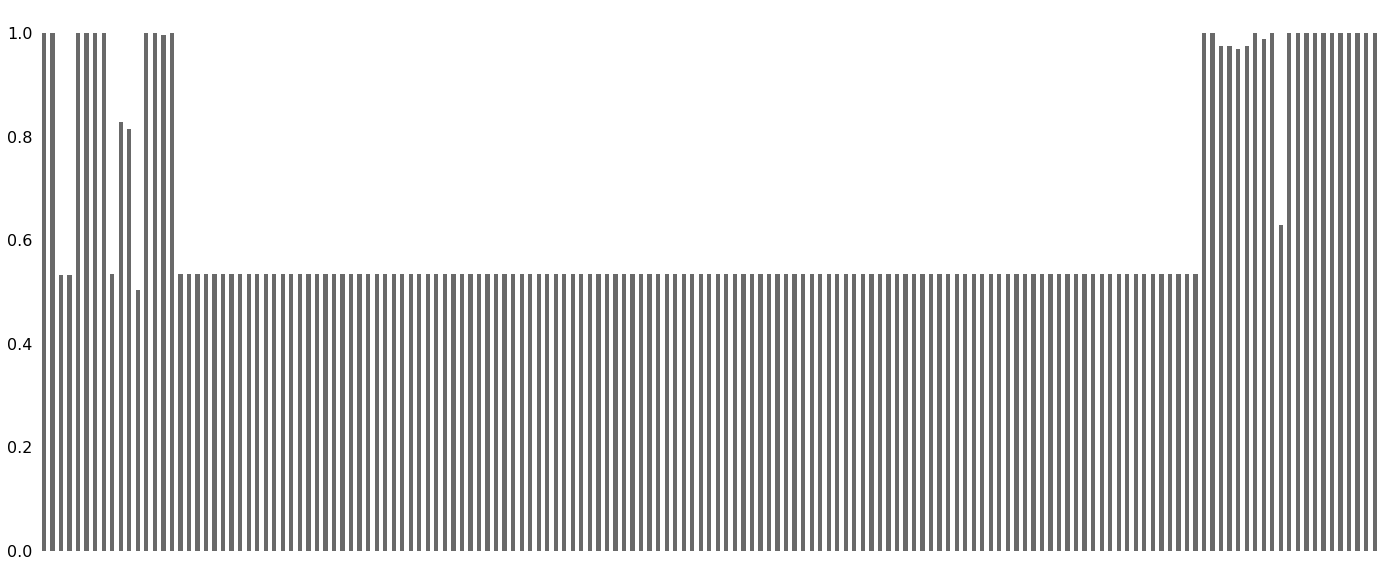

In [66]:
import missingno as msno
from matplotlib import pyplot as plt
msno.bar(data)
plt.show()